<h2 align=center> Toxic Comments Classification using 1D CNN with Keras</h2>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from sklearn.model_selection import train_test_split
print(tf.__version__)

2.1.0


In [3]:
train_df = pd.read_csv("train.csv").fillna(" ")

In [4]:
train_df.sample(10,random_state=1)

,comment_text,toxic
24915,"YOU ARE A FAT, GEEKY PRICK WHO HAS NOTHING TO ...",1
75819,Agent X2: Basically thanks - with a 'little' m...,0
53891,Why are my posts being deleted? \n\nI have tri...,0
154159,"""\n\n Controlled Demolitions and Common Sense ...",0
13040,I do not understand your reply. //Blaxthos ( ...,0
123190,Is this the bizarro world? Removing content is...,0
33626,"Well, WP:RS says that articles should use reli...",0
1150,Oh hear me go someone removes all my pages i g...,0
48633,can't believe this article was deleted\nI'm su...,0
42817,"""\n\n Comments on GamerGate Workshop page \n\n...",0


In [5]:
# View few toxic commentst
train_df["comment_text"].value_counts()[1:]

yes, yes, yes \nblocking an AOL user for daring to report vandalism by a registered user? yeah, I'm not sure if irony is the word you're thinking of                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                1
awesome. rip canvas. ;__; hopefully moot's future enterprises go a lot better.174.103.114.44                                                                                                                                                                                                                                                                                      

In [6]:
train_df.loc[train_df["toxic"]==1].sample(10,random_state=10)

,comment_text,toxic
30575,"""\n Are you asking if we would ever block some...",1
36038,Amen my sock-pupinski brother!! Hack-a-long: p...,1
19730,JUST READ THE FUCKING CENSUS DATA. Do you thin...,1
72261,u no wat ass hole go fuck your self and stop b...,1
77923,Go fuck yourself \n\nEat shit and die. 68.0.11...,1
16382,A big thank you\n\nYou have just blocked me in...,1
41247,A message from Jasonceyre \n\n f uc k you ho...,1
69311,"I'm gonna get the ACLU on you, you racist anti...",1
142032,"Hey Freepsbane, does your mother know that you...",1
5613,You guys suk. You really really suck. Fuck you...,1


In [6]:
train_df['comment_text'].loc[train_df['toxic']==1].values

array(['COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK',
       'Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...',
       "Bye! \n\nDon't look, come or think of comming back! Tosser.", ...,
       "Your absurd edits \n\nYour absurd edits on great white shark was total vandalism and was very sexual. All you edit here is fucking bullshit like spam all over this useful encyclopedia so stop all your bullshit. The admins have you everywhere. The only choice for you is to stop this bullshit or else you'll be blocked permanently. User:Factual80man",
       '"\n\nHey listen don\'t you ever!!!! Delete my edits ever again I\'m annoyed because the WWE 2K15 a few of the roster have been confirmed and your stupid ass deletes what

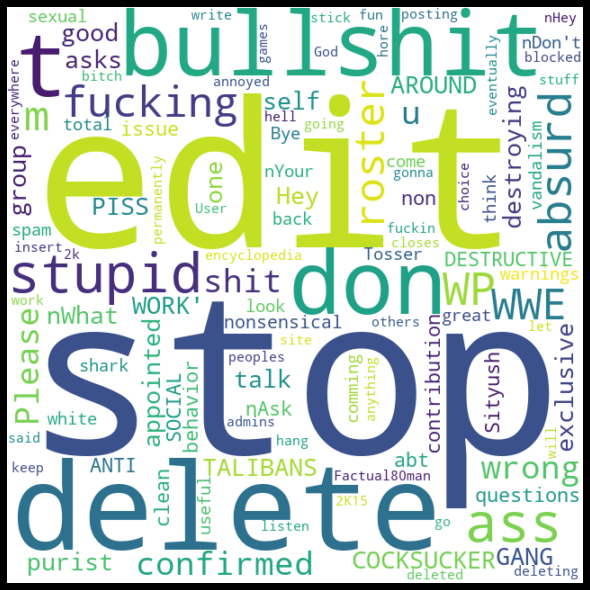

In [7]:
from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add("n")
import matplotlib.pyplot as plt
comments = train_df['comment_text'].loc[train_df['toxic']==1].values
wordcloud = WordCloud(
    width = 640,
    height = 640,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(comments))
fig = plt.figure(
    figsize = (12, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Plot frequency of toxic comments


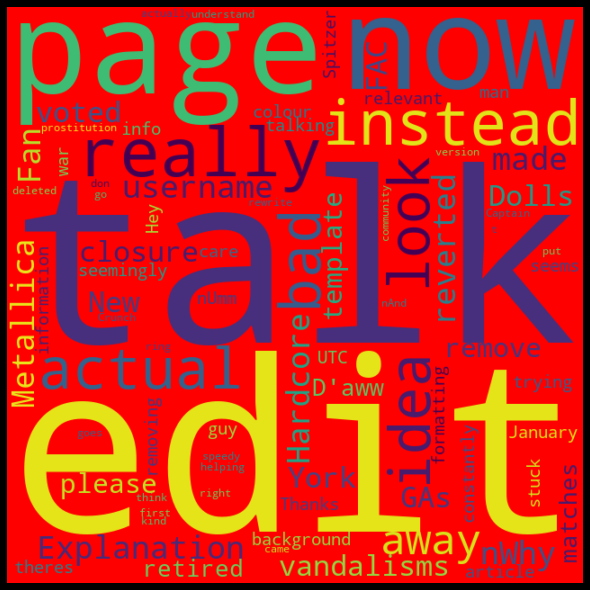

In [9]:
from wordcloud import WordCloud, STOPWORDS 
STOPWORDS.add("n") 
import matplotlib.pyplot as plt
comments = train_df['comment_text'].loc[train_df['toxic']==0].values 
wordcloud = WordCloud( 
    width = 640, 
    height = 640, 
    background_color = 'red', 
    stopwords = STOPWORDS).generate(str(comments)) 
fig = plt.figure( 
    figsize = (12, 8), 
    facecolor = 'k', 
    edgecolor = 'k') 
plt.imshow(wordcloud, interpolation = 'bilinear') 
plt.axis('off') 
plt.tight_layout(pad=0) 
plt.show() 


### Task 3: Data Prep — Tokenize and Pad Text Data

In [10]:
y = train_df.toxic 
   print(y)

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Name: toxic, Length: 159571, dtype: int64


In [11]:
y.value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

<AxesSubplot:title={'center':'toxicas'}, ylabel='Frequency'>

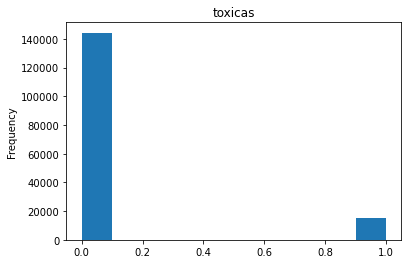

In [12]:
 # Plot frequency of toxic commen
 train_df.toxic.plot(kind="hist",title="toxicas") 

In [13]:
x = train_df.comment_text.values
print(type(x))

<class 'numpy.ndarray'>


In [14]:
max_features    = 20_000 
max_text_lenght = 400 

In [15]:
x_tokenizer  =  text.Tokenizer(max_features)
print(x_tokenizer)

In [16]:
x_tokenizer.fit_on_texts(x) 
print(type(x_tokenizer))

<class 'keras_preprocessing.text.Tokenizer'>


In [17]:
dic = x_tokenizer.__dict__.keys()
dic 

dict_keys(['word_counts', 'word_docs', 'filters', 'split', 'lower', 'num_words', 'document_count', 'char_level', 'oov_token', 'index_docs', 'word_index', 'index_word'])

In [18]:
print(dir(x_tokenizer)) 

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_keras_api_names', '_keras_api_names_v1', 'char_level', 'document_count', 'filters', 'fit_on_sequences', 'fit_on_texts', 'get_config', 'index_docs', 'index_word', 'lower', 'num_words', 'oov_token', 'sequences_to_matrix', 'sequences_to_texts', 'sequences_to_texts_generator', 'split', 'texts_to_matrix', 'texts_to_sequences', 'texts_to_sequences_generator', 'to_json', 'word_counts', 'word_docs', 'word_index']


In [19]:
for i , t in x_tokenizer.__dict__.items(): 
     print(f"{i:20} --> {type(t)}  ", end="") 
     try: 
         print(f"len --> {len(t)}") 
     except: 
         print() 
 


word_counts          --> <class 'collections.OrderedDict'>  len --> 210337
word_docs            --> <class 'collections.defaultdict'>  len --> 210337
filters              --> <class 'str'>  len --> 33
split                --> <class 'str'>  len --> 1
lower                --> <class 'bool'>  
num_words            --> <class 'int'>  
document_count       --> <class 'int'>  
char_level           --> <class 'bool'>  
oov_token            --> <class 'NoneType'>  
index_docs           --> <class 'collections.defaultdict'>  len --> 210337
word_index           --> <class 'dict'>  len --> 210337
index_word           --> <class 'dict'>  len --> 210337


In [20]:
x_tokenizer_list = x_tokenizer.texts_to_sequences(x) 
print(type(x_tokenizer_list)) 

<class 'list'>


In [21]:
print(len(x_tokenizer_list),len(x)) 
print() 
print(len(x_tokenizer_list[0]),len(x[0].split())) 
print(x[0]) 
print(x_tokenizer_list[0]) 

159571 159571

47 43
Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
[688, 75, 1, 126, 130, 177, 29, 672, 4511, 12052, 1116, 86, 331, 51, 2278, 11448, 50, 6864, 15, 60, 2756, 148, 7, 2937, 34, 117, 1221, 15190, 2825, 4, 45, 59, 244, 1, 365, 31, 1, 38, 27, 143, 73, 3462, 89, 3085, 4583, 2273, 985]


In [22]:
x_train_val  = sequence.pad_sequences(x_tokenizer_list , maxlen = max_text_lenght) 
print(type(x_train_val))

<class 'numpy.ndarray'>


In [23]:
print(x_train_val.shape) 
print(len(x_train_val)) 
print(x_train_val[0])

(159571, 400)
159571
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0

In [5]:
# descaga de embedings

#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip -q glove.6B.zip

In [24]:
embedin_dim    = 100 
embeding_index = {}   
with open("glove.6B.100d.txt","r") as f: 
    for line in f: 
        word, *coef = line.split() 
        embeding_index[word] = np.asarray(coef, dtype="float32") 
 
print(f"se encontraron {len(embeding_index)} vectores de palabras") 


se encontraron 400000 vectores de palabras


In [25]:
embeding_matrix = np.zeros((max_features , embedin_dim)) 
print(embeding_matrix.shape) 

(20000, 100)


In [26]:
for w, i in x_tokenizer.word_index.items(): 
    if i > max_features -1: 
        break 
    else: 
        embedin_vector = embeding_index.get(word) 
        if embedin_vector is not None: 
            embeding_matrix[i] = embedin_vector

In [27]:
embeding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.28365001, -0.62629998, -0.44351   , ...,  0.43678001,
        -0.82607001, -0.15701   ],
       [ 0.28365001, -0.62629998, -0.44351   , ...,  0.43678001,
        -0.82607001, -0.15701   ],
       ...,
       [ 0.28365001, -0.62629998, -0.44351   , ...,  0.43678001,
        -0.82607001, -0.15701   ],
       [ 0.28365001, -0.62629998, -0.44351   , ...,  0.43678001,
        -0.82607001, -0.15701   ],
       [ 0.28365001, -0.62629998, -0.44351   , ...,  0.43678001,
        -0.82607001, -0.15701   ]])

In [28]:
model = Sequential() 
model.add(Embedding(max_features, 
                    embedin_dim, 
                    embeddings_initializer = tf.keras.initializers.Constant(embeding_matrix), 
                    trainable = False)) 
model.add(Dropout(0.2)) 

In [29]:
hidden_dims  = 250 
filters      = 250 
kernel_size1 = 3 
kernel_size2 = 5 

In [30]:
model.add(Conv1D(filters, 
                kernel_size1, 
                padding = "valid")) 
model.add(MaxPooling1D()) 
model.add(Conv1D(filters, 
                kernel_size2, 
                padding = "valid", 
                activation = "relu")) 
model.add(GlobalMaxPooling1D()) 
model.add(Dense(hidden_dims, 
                activation = "relu")) 
model.add(Dropout(0.2)) 
model.add(Dense(1, activation = "sigmoid")) 

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         2000000   
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 250)         75250     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 250)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 250)         312750    
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               6

In [32]:
 model.compile( 
               loss      = "binary_crossentropy", 
               optimizer = "adam", 
               metrics   = ["accuracy"]) 

In [33]:
 x_train , x_val , y_train, y_val = train_test_split( 
                                        x_train_val,  
                                        y ,  
                                        test_size = 0.15, 
                                        random_state = 1) 


In [34]:
model.fit(x_train, y_train, batch_size = 32,  
                                epochs = 3, 
                                validation_data= (x_val, y_val)) 


Train on 135635 samples, validate on 23936 samples
Epoch 1/3
135635/135635 [==============================] - 2059s 15ms/sample - loss: 0.3161 - accuracy: 0.9040 - val_loss: 0.3172 - val_accuracy: 0.9036
Epoch 2/3
135635/135635 [==============================] - 1753s 13ms/sample - loss: 0.3127 - accuracy: 0.9043 - val_loss: 0.3300 - val_accuracy: 0.9036
Epoch 3/3
135635/135635 [==============================] - 2713s 20ms/sample - loss: 0.3119 - accuracy: 0.9043 - val_loss: 0.3343 - val_accuracy: 0.9036


In [43]:
test_df = pd.read_csv("test.csv") 
test_df

,comment_text
0,Yo bitch Ja Rule is more succesful then you'll...
1,== From RfC == \n\n The title is fine as it is...
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,":If you have a look back at the source, the in..."
4,I don't anonymously edit articles at all.
...,...
153159,". \n i totally agree, this stuff is nothing bu..."
153160,== Throw from out field to home plate. == \n\n...
153161,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,""" \n\n == """"One of the founding nations of the..."


In [36]:
x_test = test_df.comment_text.values 

In [37]:
x_test_token = x_tokenizer.texts_to_sequences(x_test)

In [38]:
x_testing = sequence.pad_sequences(x_test_token, maxlen = max_text_lenght)

In [39]:
y_testing = model.predict(x_testing, verbose=1, batch_size=32)

153164/153164 [==============================] - 1325s 9ms/sample


In [40]:
test_df["Toxico"] = ["toxico" if y > 0.2 else "No Toxico" for y in y_testing]

In [41]:
test_df.Toxico.value_counts()

No Toxico    116500
toxico        36664
Name: Toxico, dtype: int64

In [42]:
test_df

,comment_text,Toxico
0,Yo bitch Ja Rule is more succesful then you'll...,No Toxico
1,== From RfC == \n\n The title is fine as it is...,toxico
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",toxico
3,":If you have a look back at the source, the in...",No Toxico
4,I don't anonymously edit articles at all.,toxico
...,...,...
153159,". \n i totally agree, this stuff is nothing bu...",No Toxico
153160,== Throw from out field to home plate. == \n\n...,No Toxico
153161,""" \n\n == Okinotorishima categories == \n\n I ...",No Toxico
153162,""" \n\n == """"One of the founding nations of the...",No Toxico
